# Import modules

In [1]:
import pandas as pd

# our modules
import sys
sys.path.insert(0, '..')

from clean import clean_data
from imbalance import balance_data
from evaluate import evaluate_model

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

from lazypredict.Supervised import LazyClassifier
import seaborn as sns

In [2]:
pd.set_option("display.precision", 6)
pd.set_option("display.float_format", lambda x: "%.6f" % x)

In [3]:
RANDOM_STATE = 123

# Load data

In [4]:
data = pd.read_csv('/home/hristo/Documents/WBS_Data_Science/WBS_Predictive_Maintenance/data/ai4i2020.csv', index_col='UDI')

In [5]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.100000,308.600000,1551,42.800000,0,0,0,0,0,0,0
2,L47181,L,298.200000,308.700000,1408,46.300000,3,0,0,0,0,0,0
3,L47182,L,298.100000,308.500000,1498,49.400000,5,0,0,0,0,0,0
4,L47183,L,298.200000,308.600000,1433,39.500000,7,0,0,0,0,0,0
5,L47184,L,298.200000,308.700000,1408,40.000000,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.800000,308.400000,1604,29.500000,14,0,0,0,0,0,0
9997,H39410,H,298.900000,308.400000,1632,31.800000,17,0,0,0,0,0,0
9998,M24857,M,299.000000,308.600000,1645,33.400000,22,0,0,0,0,0,0


# Clean data

In [6]:
data_cl = clean_data(data, drop_type=True)
data_cl

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
UDI,,,,,,
1,298.100000,308.600000,1551,42.800000,0,0
2,298.200000,308.700000,1408,46.300000,3,0
3,298.100000,308.500000,1498,49.400000,5,0
4,298.200000,308.600000,1433,39.500000,7,0
5,298.200000,308.700000,1408,40.000000,9,0
...,...,...,...,...,...,...
9996,298.800000,308.400000,1604,29.500000,14,0
9997,298.900000,308.400000,1632,31.800000,17,0
9998,299.000000,308.600000,1645,33.400000,22,0


# Prepare data

In [7]:
X = data_cl.copy()
y = X.pop('Machine failure')

# Split train and test

## without balancing

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE)

## with balancing

In [9]:
data_bal, method = balance_data(X, y, 'ROS')
X_bl, y_bl = data_bal

In [10]:
print(X_bl.info())
print(y_bl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19322 entries, 0 to 19321
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      19322 non-null  float64
 1   Process temperature [K]  19322 non-null  float64
 2   Rotational speed [rpm]   19322 non-null  int64  
 3   Torque [Nm]              19322 non-null  float64
 4   Tool wear [min]          19322 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 754.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 19322 entries, 0 to 19321
Series name: Machine failure
Non-Null Count  Dtype
--------------  -----
19322 non-null  int64
dtypes: int64(1)
memory usage: 151.1 KB
None


<Axes: >

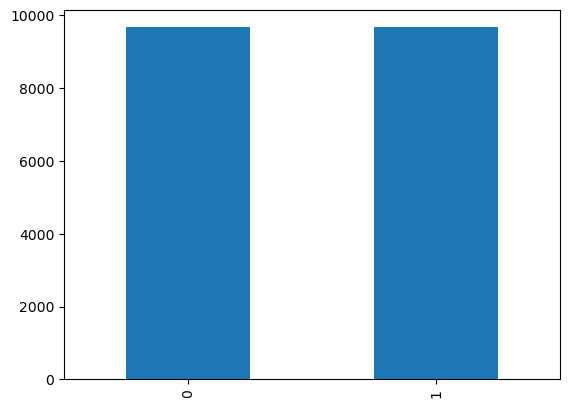

In [11]:
y_bl.value_counts().plot(kind='bar')

In [12]:
X_bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19322 entries, 0 to 19321
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      19322 non-null  float64
 1   Process temperature [K]  19322 non-null  float64
 2   Rotational speed [rpm]   19322 non-null  int64  
 3   Torque [Nm]              19322 non-null  float64
 4   Tool wear [min]          19322 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 754.9 KB


In [13]:
method

RandomOverSampler()

In [14]:
balance = True
if balance:
    X_train, X_test, y_train, y_test = train_test_split(X_bl, y_bl, train_size=0.8, random_state=RANDOM_STATE)

# Baseline model

## Pipeline

In [15]:
params = {}

In [16]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    # ('estimator', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ('estimator', ExtraTreesClassifier())
])

In [17]:
# pipe.fit(X_train, y_train)

In [18]:
# y_pred = pipe.predict(X_test)

In [19]:
grid = GridSearchCV(
    pipe,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    verbose=1
)

In [20]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator', ExtraTreesClassifier())]),
             param_grid={}, scoring='accuracy', verbose=1)

In [21]:
best_score = grid.best_score_
print(best_score)

0.9982533483053709


In [22]:
best = grid.best_estimator_

In [23]:
y_pred = best.predict(X_test)

## Evaluation

In [24]:
accuracy, recall, precision, f1s, MCC, roc = evaluate_model(y_test, y_predictions=y_pred)

In [25]:
print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"F1-Score: {f1s:.2%}")
print(f"MCC: {MCC:.2%}")
print(f"ROC AUC score: {roc:.2%}")

Accuracy: 99.87%
Recall: 99.87%
Precision: 99.87%
F1-Score: 99.87%
MCC: 99.74%
ROC AUC score: 99.87%


<Axes: >

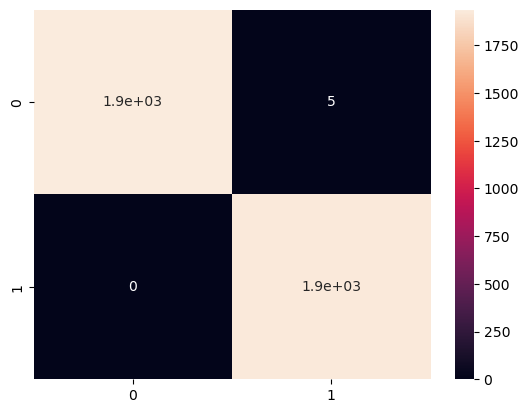

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(data=conf_matrix, annot=True)

In [27]:
conf_matrix

array([[1937,    5],
       [   0, 1923]])

# Lazy Osveh method

In [28]:
from lazypredict.Supervised import LazyClassifier

In [29]:
clf = LazyClassifier(predictions=True)

In [30]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 29/29 [00:21<00:00,  1.38it/s]


In [31]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.999224,0.999228,0.999228,0.999224,0.415309
RandomForestClassifier,0.996895,0.996910,0.996910,0.996895,0.712095
XGBClassifier,0.995084,0.995108,0.995108,0.995084,1.682431
BaggingClassifier,0.994825,0.994851,0.994851,0.994825,0.140922
DecisionTreeClassifier,0.993532,0.993563,0.993563,0.993532,0.038219
LGBMClassifier,0.991721,0.991761,0.991761,0.991720,0.461702
ExtraTreeClassifier,0.990168,0.990216,0.990216,0.990168,0.016669
KNeighborsClassifier,0.978784,0.978888,0.978888,0.978777,0.056785
LabelPropagation,0.964295,0.964470,0.964470,0.964256,3.328544


<Axes: >

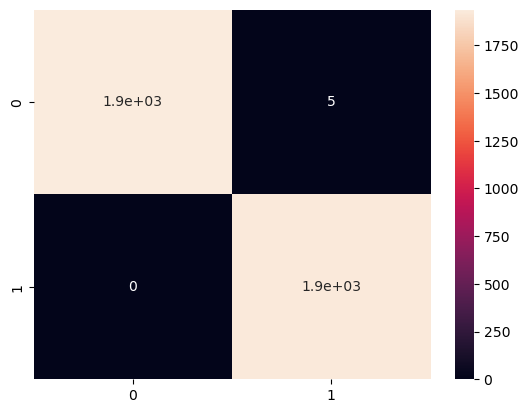

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(data=conf_matrix, annot=True)